### Double Null Code- Evolution Only

This code solves for functions $r(u,v)$, $\sigma(u,v)$, $\Phi(u,v)$ within a grided spacetime given initial parameters and boundary conditions. 

In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
import Double_Null_utils as dnu


In [2]:
###Initial Values###

M0=1.0
Q=0.95
scalarfield=False

- $M_0$ is the initial mass parameter
- $Q$ is the charge parameter (constant throughout)
- $scalarfield$ if $True$ applies a scalar field on the $u=constant=u_0$ boundary

In [3]:
N=160
scal=1
umax=13
vmax=50
ru0=5.0
dr0v=.4

bdytype="stan"
scaltostan=True
solveaffine=False

Elist=[1]
#Elist=[1,2,4,8,16]

#uloc=[1/8,1/4,3/8,1/2,5/8]
#uloc=[1/5,2/5,3/5,4/5,9/10]
uloc=[8.2/10]


- $N$ is the number of points per coordinate (determines resolution)
- $scal$ increases the resolution for the boundary conditions
- $u_{max}$ is the max value for $u$ 
- $v_{max}$ is the max value for $v$ 
- $r_{u0}$ is the initial value $r(u_0,v_0)$
- $dr0v$ is the intial value $r_{,v}(u_0,v_0)$

- $bdytype$ indicates the type of boundary (standard "stan", horizon resolving "hor", maximal "max") 
- $Elist$ allows the code to run for multiple resolutions $N'$. These resolutions are the arguments multiplied by $N$
- $uloc$ tells for which $v$ the code should plot (multplies $v_{max}$ to get $v$, values can range from $0 \leq x <1$)

Note that typical values for $N$ depend on the boundary conditions being used

$stan \rightarrow N=20-160$

$max \rightarrow N=5-40$

where the lower values are around 2 min and the upper are around 20 min (for an i7-7700k).

In [4]:
###Defining Needed Constants###

scalf=float(scal)
u0=0.0
v0=0.0
rv0=ru0
phiu0=0.0
phiv0=0.0

if M0==0.0:
    du00=1/N
    du0=du00
else:
    du00=M0/N
    du0=du00
dv00=du00
dv0=du0

rplus=M0+(M0**2.0-Q**2.0)**.5
rminus=M0-(M0**2.0-Q**2.0)**.5
print("r+: "+str(rplus))
print("r-: "+str(rminus))

###Predicting Run time###

###timer
start = timeit.default_timer()

Nu=int(umax/du0)
Nv=int(vmax/dv0)
#print("Number of points for lowest iteration is "+str(Nu*Nv)+","+str(Nu)+"X"+str(Nv))
print("Number of points for highest iteration is "+str(Nu*Nv*max(Elist)**2)+","+str(Nu*max(Elist))+"X"+str(Nv*max(Elist)))

numpoints=0.0
for i in range(0,len(Elist)):
    numpoints=Elist[i]**2.0*Nu*Nv+numpoints
print("Total number of points is "+str(int(numpoints)))

predtime=numpoints/(56000)

print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")


r+: 1.31224989991992
r-: 0.6877501000800801
Number of points for highest iteration is 16640000,2080X8000
Total number of points is 16640000
Runtime: about 4.95 minutes


The code predicts the runtime (based on an Intel i7-7700K CPU)

### Apply Boundary Conditions

In [5]:
##################################
###Applying Boundary Conditions###

Emax=max([Elist])

rnpf=np.zeros((Nu*max(Elist),Nv*max(Elist),len(Elist)))
signpf=np.zeros((Nu*max(Elist),Nv*max(Elist),len(Elist)))
phinpf=np.zeros((Nu*max(Elist),Nv*max(Elist),len(Elist)))
dphinpuf=np.zeros((Nu*max(Elist),len(Elist))) #tempphinpu
#tempsignpu
massnpf=np.zeros((Nu*max(Elist),Nv*max(Elist),len(Elist)))

temprnpu=np.zeros((Nu*max(Elist)))
temprnpv=np.zeros((Nv*max(Elist)))
tempsignpu=np.zeros((Nu*max(Elist)))
tempsignpv=np.zeros((Nv*max(Elist)))
tempphinpu=np.zeros((Nu*max(Elist)))
tempphinpv=np.zeros((Nv*max(Elist)))
tempdphipu=np.zeros((Nu*max(Elist)))

#tempsignpu=np.zeros((Nu*max(Elist),Nv*max(Elist)))



for k in range(0,len(Elist)):
    temprnpu,  temprnpv, tempsignpu, tempsignpv, tempphinpu ,tempphinpv = dnu.boundary(scal,Elist[k],bdytype,Nu,Nv,ru0,dr0v,du0,vmax,M0,Q,scalarfield)
    for i in range(0,Nu*Elist[k]):
        rnpf[i][0][k]=temprnpu[i]
        signpf[i][0][k]=tempsignpu[i]
        phinpf[i][0][k]=tempphinpu[i]
    for j in range(0,Nv*Elist[k]):
        rnpf[0][j][k]=temprnpv[j]
        signpf[0][j][k]=tempsignpv[j]
        phinpf[0][j][k]=tempphinpv[j]


temprnpu=None
temprnpv=None
tempsignpu=None
tempsignpv=None
tempphinpu=None
tempphinpv=None
#tempphinpu=None

This section applies boundary conditions to empty arrays. Some work needs to be done with the function to optimize it more fully, since this section often takes much longer than other sections

In [6]:
print(rnpf)

[[[  5.        ]
  [  5.0025    ]
  [  5.005     ]
  ..., 
  [ 24.9925    ]
  [ 24.995     ]
  [ 24.9975    ]]

 [[  4.99751523]
  [  0.        ]
  [  0.        ]
  ..., 
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  4.99503047]
  [  0.        ]
  [  0.        ]
  ..., 
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 ..., 
 [[  0.        ]
  [  0.        ]
  [  0.        ]
  ..., 
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  ..., 
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  ..., 
  [  0.        ]
  [  0.        ]
  [  0.        ]]]


### Evolve Spacetime

In [7]:
drunp=np.zeros((Nu*max(Elist),Nv*max(Elist),len(Elist)))
dsigunp=np.zeros((Nu*max(Elist),Nv*max(Elist),len(Elist)))



###Applying Propagation Algorithm###
for k in range(0,len(Elist)):
    if bdytype=="max" or bdytype=="hor":
        drnpu=np.zeros((Nu*Elist[k])) 
        dsignpu=np.zeros((Nu*Elist[k]))
        dphinpuf=np.zeros((Nu*Elist[k]))
        sigu0=0.0
        drnpu[0]=-mth.exp(sigu0)/(4.0*dr0v)*(Q**2.0/ru0**2.0-2*M0/ru0+1.0)
        drnpu[1]=-mth.exp(sigu0)/(4.0*dr0v)*(Q**2.0/ru0**2.0-2*M0/ru0+1.0)
        sigmamaxlist=[]
        sigmaxu=[]
        sigmaxu.append(0.0)
        sigmaxu.append(0.0)
    for i in range(0,Nu*Elist[k]-1):
        for j in range(0,Nv*Elist[k]-1):
            answer=dnu.x4giver(i,j,Elist[k],k,du00,rnpf,phinpf,signpf,Q)
            rnpf[i+1][j+1][k]=answer[0]
            phinpf[i+1][j+1][k]=answer[1]
            signpf[i+1][j+1][k]=answer[2]
            massnpf[i+1][j+1][k]=answer[3]
            drunp[i+1][j+1][k]=answer[4]
            dsigunp[i+1][j+1]=answer[5]
            #dsignp[i+1][j+1]=answer[6]
            
            if bdytype=="hor" or bdytype=="max"  and i<Nu*Elist[k]-2:
                sigmamaxlist.append(signpf[i+1][j+1][k])
        if bdytype=="hor" and i<Nu*Elist[k]-2:
            
            sigma1=signpf[i+1][0][k]-signpf[i+1][-1][k]
            sigma2=signpf[i][0][k]-signpf[i][-1][k]
            sigma3=signpf[i-1][0][k]-signpf[i-1][-1][k]
            dt=(du00/Elist[k])
            
            signpf[i+2][0][k]=sigma1*(3.0*2.0)/(2.0)+sigma2*(3.0)/(-1.0)+sigma3*(2.0)/(2.0)
            
            dsignpu[i+1]=(signpf[i+2][0][k]-signpf[i+1][0][k])/dt
            dphinpuf[i+1]=(phinpf[i+2][0][k]-phinpf[i+1][0][k])/dt
            
            rnpf[i+2][0][k]=rnpf[i+1][0][k]+dt*drnpu[i+1]
            
            drnpu[i+2]=drnpu[i+1]+dt*(drnpu[i+1]*dsignpu[i+1]-rnpf[i+1][0][k]*dphinpuf[i+1]**2.0)
            
        if bdytype=="max" and i<Nu*Elist[k]-2:
            
            sigmaxu.append(max(sigmamaxlist))
            sigma1=signpf[i+1][0][k]-sigmaxu[i+2]
            sigma2=signpf[i][0][k]-sigmaxu[i+1]
            sigma3=signpf[i-1][0][k]-sigmaxu[i]
            dt=(du00/Elist[k])
            
            signpf[i+2][0][k]=sigma1*(3.0*2.0)/(2.0)+sigma2*(3.0)/(-1.0)+sigma3*(2.0)/(2.0)
            
            dsignpu[i+1]=(signpf[i+2][0][k]-signpf[i+1][0][k])/dt
            dphinpuf[i+1]=(phinpf[i+2][0][k]-phinpf[i+1][0][k])/dt
            
            rnpf[i+2][0][k]=rnpf[i+1][0][k]+dt*drnpu[i+1]
            
            drnpu[i+2]=drnpu[i+1]+dt*(drnpu[i+1]*dsignpu[i+1]-rnpf[i+1][0][k]*dphinpuf[i+1]**2.0)
            
            if rnpf[i+2][0][k]<0.0:
                signpf[i+2][0][k]=np.nan
                dsignpu[i+1]=np.nan
                rnpf[i+2][0][k]=np.nan
                drnpu[i+2]=np.nan
            
            sigmamaxlist=[]

Based on the boundary conditions used, the code uses the evolution algorithm to solve for the functions on the rest of the spacetime. If the boundary conditions are $max$ (maximal gauge) or $hor$ (outer event horizon resolving gauge) then the code solves for new boundary conditions along $v=v_0$ .

If a scalar field is applied, the code estimates the new final horizons


In [8]:
###Rescaling to Standard Gauge###

urange=np.zeros((len(Elist),Nu*max(Elist)))
vrange=np.zeros((len(Elist),Nv*max(Elist)))
urange0=np.zeros((Nu))
vrange0=np.zeros((Nv))
rminuslist=np.zeros((Nv))
rminuslistv=np.zeros((Nu))
rpluslist=np.zeros((Nv))
rpluslistv=np.zeros((Nu))


if bdytype=="stan" or scaltostan==False:
    
    for k in range(0,len(Elist)):
        dt=du0/float(Elist[k])
        for i in range(0,Nu*Elist[k]-1):
            urange[k][i+1]=urange[k][i]+dt 
            if k==0:
                #rminuslistv[i]=rminus
                #rpluslistv[i]=rplus
                urange0[i+1]=urange[k][i+1]
        for j in range(0,Nv*Elist[k]-1):
            vrange[k][j+1]=vrange[k][j]+dt
            if k==0:
                #rminuslist[j]=rminus
                #rpluslist[j]=rplus
                vrange0[j+1]=vrange[k][j+1]
    
else:
    for k in range(0,len(Elist)):
        dt=du0/float(Elist[k])
        for i in range(0,Nu*Elist[k]-1):
            urange[k][i+1]=urange[k][i]+dt*mth.exp(signpf[i][0][k]) 
            if k==0:
                #rminuslistv[i]=rminus
                #rpluslistv[i]=rplus
                urange0[i+1]=urange[k][i+1]
        for j in range(0,Nv*Elist[k]-1):
            vrange[k][j+1]=vrange[k][j]+dt*mth.exp(signpf[0][j][k])
            if k==0:
                #rminuslist[j]=rminus
                #rpluslist[j]=rplus
                vrange0[j+1]=vrange[k][j+1]
                
for i in range(0,Nu*Elist[0]):
    rminuslistv[i]=rminus
    rpluslistv[i]=rplus
for j in range(0,Nv*Elist[0]):
    rminuslist[j]=rminus
    rpluslist[j]=rplus

If $scaltostan=True$ and the maximal gauge is chosen then the code rescales the u-max coordinate to the u coordinate of the standard gauge.

Checks for an apparent horizon (i.e where $r_{,u}=0$). If there is none, then inserts $nan$

In [9]:
np.save('rnp.npy',rnpf[:,:,-1])
np.save('sig.npy',signpf[:,:,-1])
np.save('phi.npy',phinpf[:,:,-1])
np.save('mass.npy',massnpf[:,:,-1])
np.save('rnputil',np.array([N*Elist[-1],Nu*Elist[-1],Nv*Elist[-1],ru0,dr0v,M0,Q]))
np.save('urange',urange[-1][:])
np.save('vrange',vrange[-1][:])
#np.save('sigu',signpf[:,0,-1])

In [10]:
levels=np.arange(10.0, np.nanmax(rnpf), 5.0 )


if rplus==0.0 and scalarfield==False:
    levels=np.insert(levels,0,[ru0])
if Q==0.0 and scalarfield==False and M0>0.0:
    levels=np.insert(levels,0,[1.0,rplus,3.0,4.0,ru0])
if scalarfield==True and Q==0.0 and M0>0.0:
    levels=np.insert(levels,0,[0.1,rplus,ru0])
if scalarfield==True and Q>0.0:
    levels=np.insert(levels,0,[.1,.3,rminus,rplus,ru0])
if scalarfield==False and Q>0.0:
    #levels=np.insert(levels,0,[0.1,rminus,rminus+0.001,rminus+0.002,rminus+0.003,rminus+0.004,rminus+0.005,rminus+0.006,rminus+0.007,rminus+0.008,rminus+0.009,rminus+0.01,rminus+0.011,rminus+0.012,rminus+0.013,rminus+0.014,rminus+0.015,rminus+0.016,rminus+0.017,rminus+0.018,rminus+0.020,rminus+0.025,rminus+0.030,rminus+0.035,rplus-0.5,rplus-0.4,rplus,ru0])
    #levels=np.insert(levels,0,[0.1,rminus,rminus+0.003,rminus+0.006,rminus+0.009,rminus+0.012,rminus+0.015,rminus+0.018,rminus+0.025,rminus+0.030,rminus+0.035,rplus-0.5,rplus-0.4,rplus,ru0])
    #levels=np.insert(levels,0,[0.1,rminus-.01,rminus,.689,.690,.691,0.7,0.8,0.9,1.0,rplus,ru0])
    #levels=np.insert(levels,0,[.5,.6,.65,.67,.68,.685,.687,.8,.9,1.0,ru0])
    levels=[.683,.685,.69,1.0,5.0,10.0,15.0,20.0,25.0,30.0]
print(levels)  

[0.683, 0.685, 0.69, 1.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0]


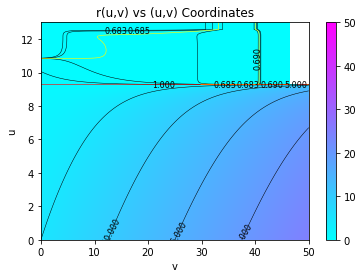

In [11]:
#rnpm=np.ma.masked_invalid(rnp)

plot1=plt.pcolormesh(vrange[-1],urange[-1],np.ma.masked_invalid(rnpf[:,:,-1]),cmap=plt.cm.cool,vmin=0.0,vmax=50.0)#np.nanmax(rnpf[:,:,-1]))#np.nanmax(rnpf[:,:,-1]))# norm=LogNorm(vmin=0.6, vmax=.8))#

plt.xlim(0,50)
plt.ylim(0,13)
#plt.ylim(0,13)

plot4=plt.contour(vrange[-1],urange[-1],rnpf[:,:,-1], levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#plot5=plt.contour(vrange[-1],urange[-1],rnpf[:,:,-1], [rminus+0.001131],linewidths=0.6,colors='yellow',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange[-1],urange[-1],rnpf[:,:,-1], [rminus],linewidths=0.6,colors='yellow',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot6=plt.contour(vrange[-1],urange[-1],rnpf[:,:,-1], [rplus],linewidths=0.6,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.clabel(plot4, levels, inline=0, inline_spacing=0, fmt='%1.3f',rightside_up=True, fontsize=8)
if solveaffine==True:
    CHorizon=plt.plot(CH
                      .
                      list,urange[-1][int(uEH*Nu*Elist[-1]):],color='g')
#sample3=plt.plot(vrange[-1],drdvnplistscal)

plt.xlabel('v')
plt.ylabel('u')

#plt.ylim(7.95,8.2)
#plt.ylim(0,np.nanmax(urange[-1]))
plt.colorbar(plot1)
plt.title('r(u,v) vs (u,v) Coordinates')
#plt.grid()
#plt.savefig('Test.png',dpi=300)
plt.show()

In [12]:
stop = timeit.default_timer()

In [13]:
acttime=stop - start

print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str((numpoints)/(stop - start))+' points per second') 

exttime=format((acttime-predtime)/60,'.2f')

print("Took "+str(exttime)+" more minutes")

252.82226824261872 seconds
4.213704470710312 minutes
0.07022840784517187 hours
65816.98722848087 points per second
Took -0.74 more minutes


In [14]:
print(rnpf[:,:,-1])

[[  5.           5.0025       5.005      ...,  24.9925      24.995       24.9975    ]
 [  4.99751523   5.00001459   5.00251395 ...,  24.98890026  24.99140023
   24.9939002 ]
 [  4.99503047   4.99752919   5.00002791 ...,  24.98529964  24.98779958
   24.99029952]
 ..., 
 [  0.           0.16070332   0.21135174 ...,          nan          nan
           nan]
 [  0.           0.16070278   0.21135184 ...,          nan          nan
           nan]
 [  0.           0.16070225   0.21135193 ...,          nan          nan
           nan]]


In [15]:
#print(signpf[:,0,-1])
for i in range(0,Nu-1):
    print("%.32f" % (urange0[i+1]-urange0[i]))

0.00625000000000000034694469519536
0.00625000000000000034694469519536
0.00625000000000000208166817117217
0.00624999999999999861222121921855
0.00624999999999999861222121921855
0.00624999999999999861222121921855
0.00624999999999999861222121921855
0.00624999999999999861222121921855
0.00624999999999999861222121921855
0.00624999999999999861222121921855
0.00624999999999999861222121921855
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00624999999999999167332731531133
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.00625000000000000555111512312578
0.006250000000000005

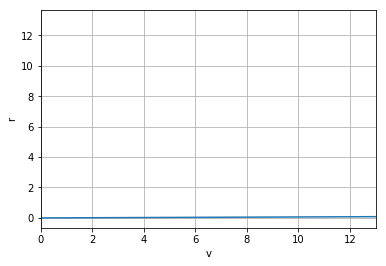

In [16]:
plt.plot(urange0)#,rnpf[300,:])
#plt.ylim(0,10)
plt.xlim(0,13)
plt.xlabel('v')
plt.ylabel('r')
plt.grid()
plt.show()


In [17]:
print(vrange)

[[  0.00000000e+00   6.25000000e-03   1.25000000e-02 ...,   4.99812500e+01
    4.99875000e+01   4.99937500e+01]]


In [18]:
#print(rnpf[1000,0])